['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]
    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619    

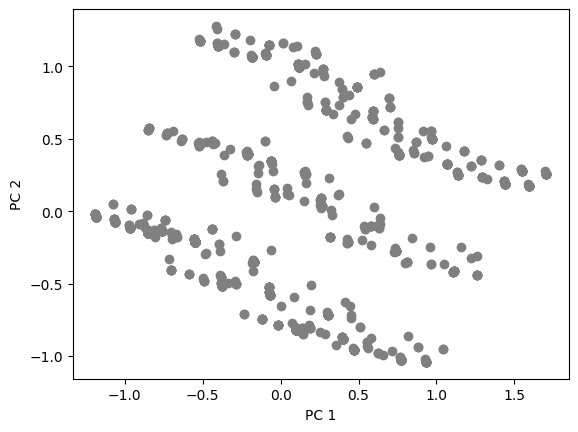

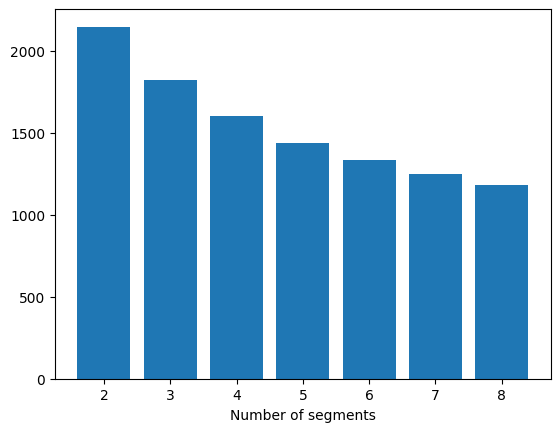

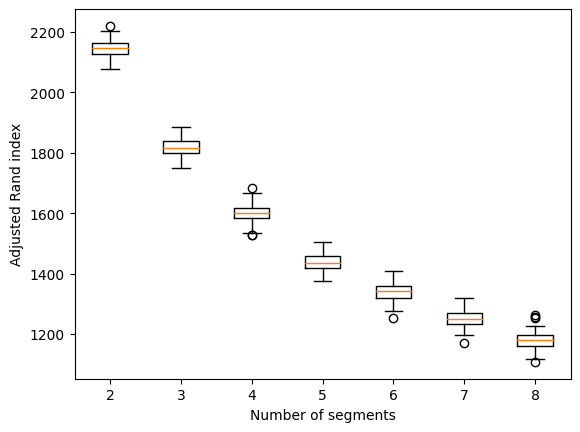

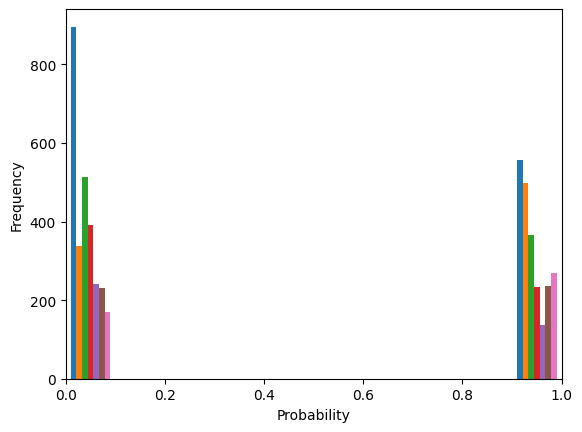

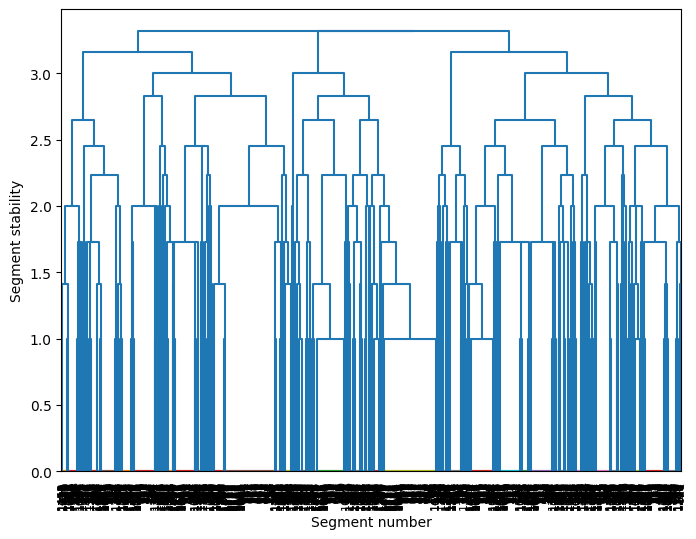

Model 2:
GaussianMixture(n_components=2)
Model 3:
GaussianMixture(n_components=3)
Model 4:
GaussianMixture(n_components=4)
Model 5:
GaussianMixture(n_components=5)
Model 6:
GaussianMixture(n_components=6)
Model 7:
GaussianMixture(n_components=7)
Model 8:
GaussianMixture(n_components=8)


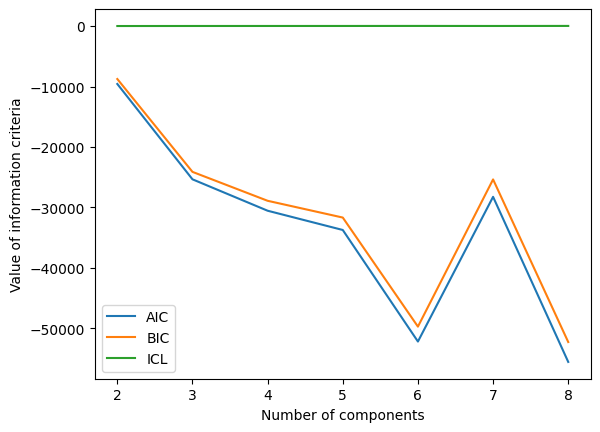

Mixture    0    1    2    3
K-means                    
0        178  299    0   36
1        184  114   67    1
2         11    0  227    4
3         26   33   34  239
Mixture    0    1    2    3
K-means                    
0          0  193    0  320
1        234   25    0  107
2         95    0  141    6
3          0    4  254   74
Log-Likelihood (Mixture Model with Fixed Clusters): 5.76154900778448
Log-Likelihood (Fitted Mixture Model): 10.722008218391974
+1              152
+2              187
+3              229
+4              160
-1               58
-2               59
-3               73
-4               71
0               169
I hate it!-5    152
I love it!+5    143
Name: Like, dtype: int64
2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: Like.n, dtype: int64
Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [4]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")


data=pd.read_csv('mcdonalds.csv')
col=data.columns.tolist()
print(col)

dim= data.shape
print(dim)

head_data= data.head(3)
print(head_data)


MD_x= data.iloc[:, 0:11].values

# Handle string values in the "Like" column
MD_x[MD_x[:, 10] == "I love it!+5", 10] = "5"

MD_x= (MD_x == "Yes").astype(int)
column_means= np.round(np.mean(MD_x, axis=0), 2)
print(column_means)

# Assuming MD_x is a pandas DataFrame containing your data

# Instantiate the PCA object
MD_pca = PCA()

# Perform PCA on MD.x
MD_pca.fit(MD_x)


# Get the summary
summary = pd.DataFrame({
    'Standard deviation': MD_pca.explained_variance_ ** 0.5,
    'Proportion of Variance': MD_pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(MD_pca.explained_variance_ratio_)
})
print(summary)
summary=summary.round(1)

plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], c='grey')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

# Perform K-means clustering
k_values = range(2, 9)
results = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    results.append(kmeans)

# Plot number of segments vs. within-cluster sum of squares
plt.bar(k_values, [res.inertia_ for res in results])
plt.xlabel("Number of segments")
plt.show()

# Perform bootstrapped K-means clustering
bootstrap_results = []
for k in k_values:
    bootstrap_scores = []
    for _ in range(100):
        bootstrap_sample = np.random.choice(range(MD_x.shape[0]), size=MD_x.shape[0], replace=True)
        bootstrap_data = MD_x[bootstrap_sample]
        kmeans = KMeans(n_clusters=k, random_state=1234)
        kmeans.fit(bootstrap_data)
        bootstrap_scores.append(kmeans.inertia_)
    bootstrap_results.append(bootstrap_scores)

# Plot number of segments vs adjusted Rand index
plt.boxplot(bootstrap_results)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand index")
plt.xticks(range(1, len(k_values) + 1), k_values)
plt.show()

# Assuming MD.x is the input data matrix and MD.k4 is the cluster labels
# Assuming MD.km28 is the KMeans clustering result

# Plot histogram of cluster membership probabilities
plt.hist([res.labels_ for res in results], bins=10, range=(0, 1))
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.xlim(0, 1)
plt.show()

# Extract the cluster labels for the desired segment
MD_k4 = [res.labels_ for res in results]

# Calculate segment stability
# Assuming x is the input data matrix and MD_k4 is the cluster labels

# Fit K-means clustering with the desired number of segments
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)

# Calculate silhouette scores for each data point
silhouette_vals = silhouette_samples(MD_x, kmeans.labels_)

# Sort the silhouette scores and extract the average silhouette score for each segment
segment_stability = []
for cluster in range(k):
    cluster_silhouette_vals = silhouette_vals[MD_k4 == cluster]
    segment_stability.append(cluster_silhouette_vals.mean())


# Perform clustering stability analysis
MD_k4 = results[2]
MD_r4 = linkage(MD_x, method='complete')
plt.figure(figsize=(8, 6))
dendrogram(MD_r4, color_threshold=1, leaf_font_size=8, labels=None)
plt.xlabel("Segment number")
plt.ylabel("Segment stability")
plt.show()

# Assuming MD.x is the input data matrix

# Fit Gaussian mixture models for different number of components (2 to 8)
k_values = range(2, 9)
models = []
for k in k_values:
    model = GaussianMixture(n_components=k)
    model.fit(MD_x)
    models.append(model)

# Print the fitted mixture models
for i, model in enumerate(models):
    print(f"Model {i+2}:")
    print(model)

# Plot information criteria
AIC = [model.aic(MD_x) for model in models]
BIC = [model.bic(MD_x) for model in models]
ICL = [model.lower_bound_ for model in models]
plt.plot(k_values, AIC, label="AIC")
plt.plot(k_values, BIC, label="BIC")
plt.plot(k_values, ICL, label="ICL")
plt.ylabel("Value of information criteria")
plt.xlabel("Number of components")
plt.legend()
plt.show()

# Extract the model with the desired number of components
desired_k = 4
desired_model = models[desired_k - 2]

# Obtain the cluster assignments from the desired model
MD_m4_clusters = desired_model.predict(MD_x)

# Compare cluster assignments from K-means and Gaussian mixture model
kmeans = KMeans(n_clusters=desired_k, random_state=1234)
kmeans_clusters = kmeans.fit_predict(MD_x)
table = pd.crosstab(kmeans_clusters, MD_m4_clusters, rownames=["K-means"], colnames=["Mixture"])
print(table)

# Fit a Gaussian mixture model with fixed cluster assignments
MD_m4a = GaussianMixture(n_components=desired_k)
MD_m4a.fit(MD_x, MD_m4_clusters)

# Compare cluster assignments from K-means and the fitted Gaussian mixture model
MD_m4a_clusters = MD_m4a.predict(MD_x)
table = pd.crosstab(kmeans_clusters, MD_m4a_clusters, rownames=["K-means"], colnames=["Mixture"])
print(table)

# Calculate log-likelihoods of the fitted Gaussian mixture models
loglik_m4a = MD_m4a.score(MD_x)
loglik_m4 = desired_model.score(MD_x)
print(f"Log-Likelihood (Mixture Model with Fixed Clusters): {loglik_m4a}")
print(f"Log-Likelihood (Fitted Mixture Model): {loglik_m4}")

# Reverse levels of the 'Like' variable
like_table = data['Like'].value_counts().sort_index(ascending=False)
like_table_rev = like_table.iloc[::-1]
print(like_table_rev)

# Replace the problematic value with NaN
data['Like'] = pd.to_numeric(data['Like'], errors='coerce')

# Create a new variable 'Like.n' by subtracting 'Like' from 6
data['Like.n'] = 6 - data['Like']

# Drop rows with NaN values in 'Like.n'
data = data.dropna(subset=['Like.n'])

# Create a frequency table of 'Like.n'
like_n_table = data['Like.n'].value_counts().sort_index()
print(like_n_table)

# Construct the formula for the regression model
formula = 'Like.n ~ ' + ' + '.join(data.columns[0:11])
print(formula)


Continuation for the above Code
0     152
1     187
2     229
3     160
4      58
5      59
6      73
7      71
8     169
9     152
10    143
Name: Like, dtype: int64
-4    143
-3    152
-2    169
-1     71
 0     73
 1     59
 2     58
 3    160
 4    229
 5    187
 6    152
Name: Like.n, dtype: int64
Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
1453


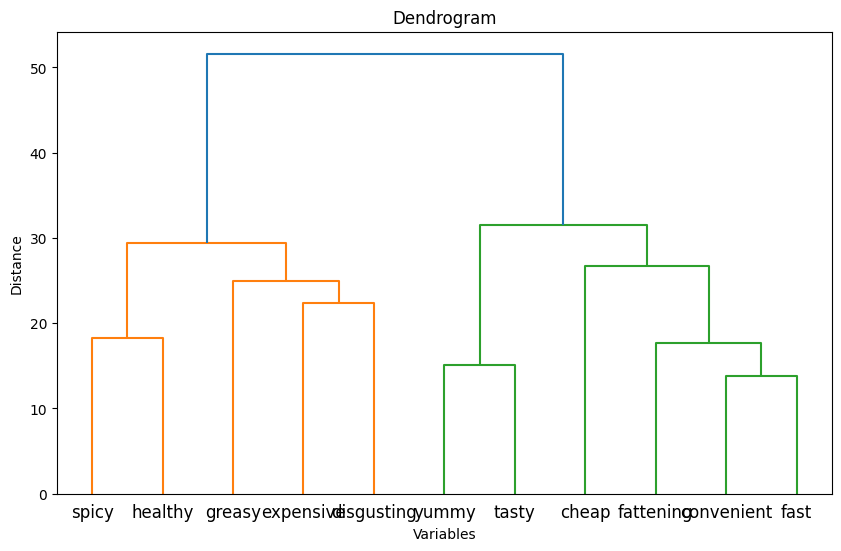

(1453,)
(1453, 2)


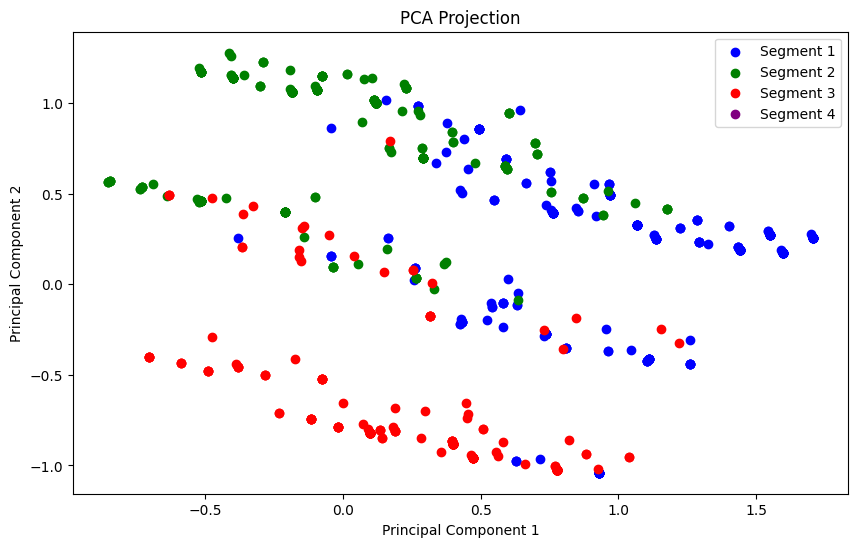

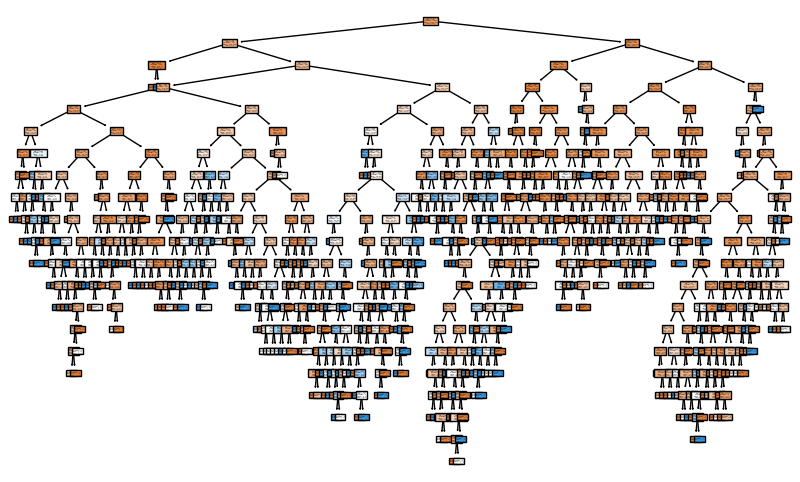

[2.65920826 2.65423729 2.51948052 2.71003717]
[ 2.08605852 -0.48474576  2.15584416  0.92193309]
[0. 0. 0. 0.]


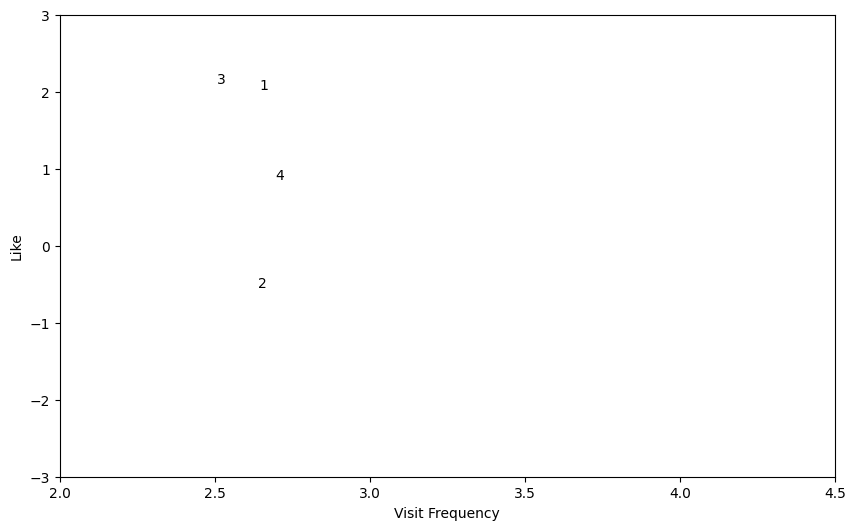

In [10]:
print("Continuation for the above Code")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('mcdonalds.csv')

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the categorical columns
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

np.random.seed(1234)

# Reverse levels of the 'Like' variable
like_table = data['Like'].value_counts().sort_index(ascending=False)
like_table_rev = like_table.iloc[::-1]
print(like_table_rev)

# Replace the problematic value with NaN
data['Like'] = pd.to_numeric(data['Like'], errors='coerce')

# Create a new variable 'Like.n' by subtracting 'Like' from 6
data['Like.n'] = 6 - data['Like']

# Drop rows with NaN values in 'Like.n'
data = data.dropna(subset=['Like.n'])

# Create a frequency table of 'Like.n'
like_n_table = data['Like.n'].value_counts().sort_index()
print(like_n_table)

# Construct the formula for the regression model
formula = 'Like.n ~ ' + ' + '.join(data.columns[0:11])
print(formula)

# Perform hierarchical clustering using Ward's method
MD_x = data.iloc[:, 0:11].transpose()
MD_dmatrix = pdist(MD_x, metric='euclidean')  # Calculate distance matrix using Euclidean distance
MD_vclust = linkage(MD_dmatrix, method='ward')
cluster_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
MD_k4 = cluster_model.fit_predict(MD_x.transpose())

# Ensure MD_k4 has 1453 labels
print(len(MD_k4))  # Should output 1453


# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(MD_vclust, labels=data.columns[0:11])
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


# Perform PCA
MD_pca = PCA(n_components=2)
MD_x_pca = MD_pca.fit_transform(MD_x.transpose())
print(MD_k4.shape)
print(MD_x_pca.shape)

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple']
for i in range(4):
    plt.scatter(MD_x_pca[MD_k4 == i+1, 0], MD_x_pca[MD_k4 == i+1, 1], color=colors[i], label='Segment {}'.format(i+1))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.legend()
plt.show()


# Build the decision tree classifier
tree = DecisionTreeClassifier()
X = data[['Like.n', 'Age', 'VisitFrequency', 'Gender']]
y = (MD_k4 == 3).astype(int)
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, class_names=['False', 'True'], filled=True)
plt.show()

# Calculate means for VisitFrequency, Like.n, and Gender by segment
visit = np.array([data.loc[MD_k4 == i, 'VisitFrequency'].astype(float).mean() for i in range(4)])
print(visit)

like = np.array([data.loc[MD_k4 == i, 'Like.n'].mean() for i in range(4)])
print(like)

female = np.array([(data.loc[MD_k4 == i, 'Gender'] == "Female").mean() for i in range(4)])
print(female)

# Scatter plot of VisitFrequency vs Like with marker size representing female percentage
plt.figure(figsize=(10, 6))
plt.scatter(visit, like, s=10 * female, cmap='viridis')
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
for i, txt in enumerate(range(1, 5)):
    plt.text(visit[i], like[i], txt, ha='center', va='center')
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.show()